1. 라이브러리 준비

In [1]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 44.2 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import datetime as dt

from matplotlib import pyplot as plt

1. 자료 불러오기

In [4]:
df = pd.read_csv('/content/MaunaLoaDailyTemps.csv', index_col='DATE', parse_dates=True)
df.isnull().sum()
df.dropna(inplace=True)
df.isnull().sum()
df.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


2. 시각화

<Axes: xlabel='DATE'>

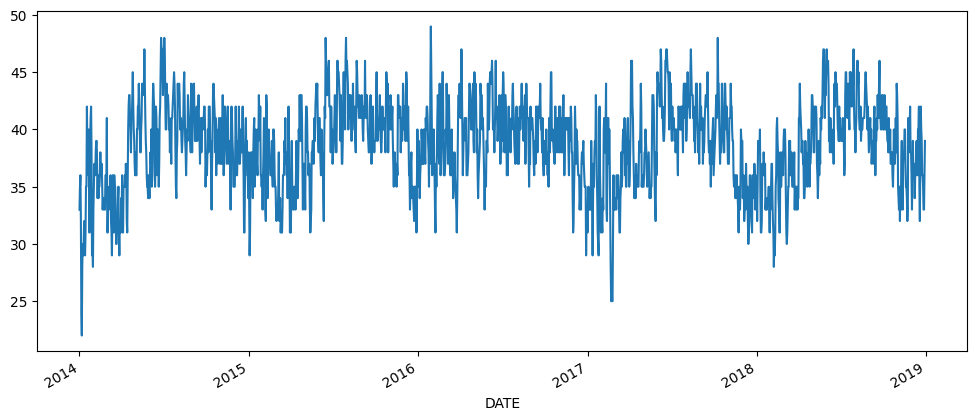

In [5]:
# 치저기온
df['MinTemp'].plot(figsize=(12,5))

<Axes: xlabel='DATE'>

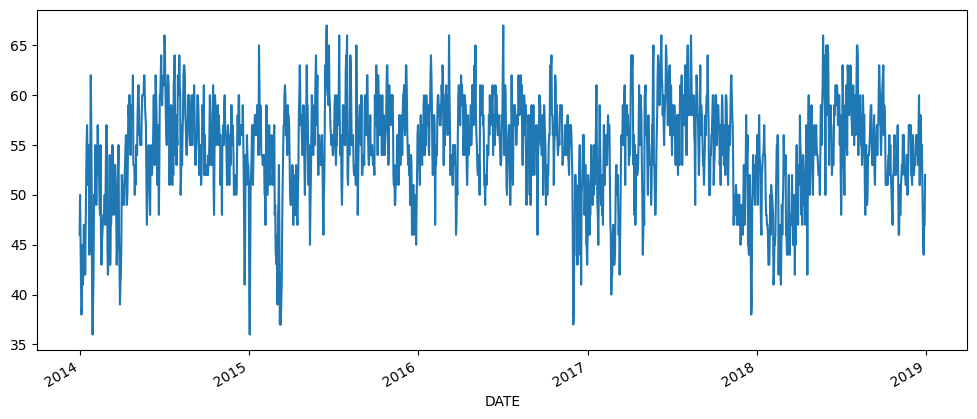

In [45]:
# 최고기온
df['MaxTemp'].plot(figsize=(12,5))

<Axes: xlabel='DATE'>

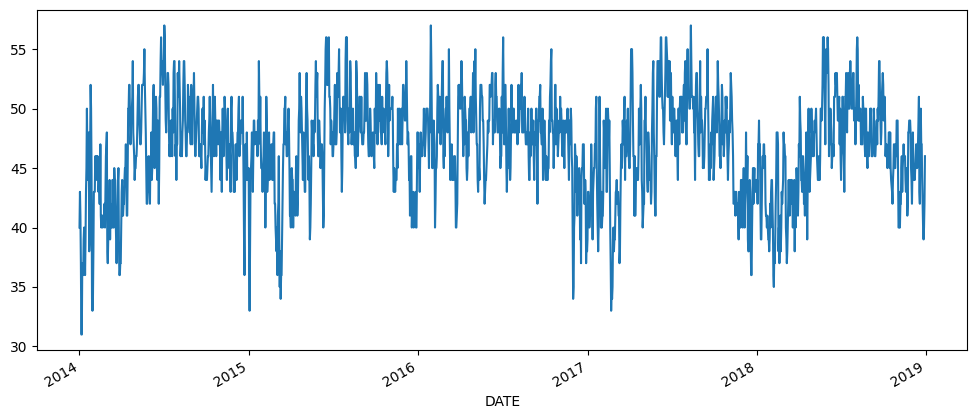

In [46]:
# 평균기온
df['AvgTemp'].plot(figsize=(12,5))

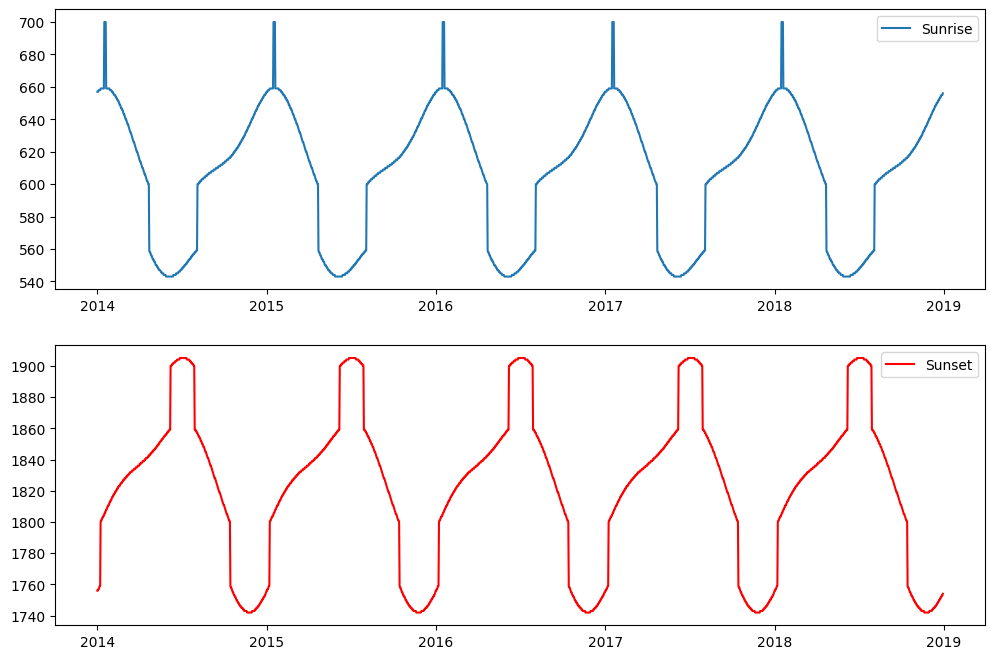

In [6]:
# 일출 & 일몰
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(df['Sunrise'])
plt.legend(['Sunrise'])
plt.subplot(212)
plt.plot(df['Sunset'], 'red')
plt.legend(['Sunset'])
plt.show()

3. 정상성 확인

In [7]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print('1. ADF :', dftest[0])
  print('2. P-Value :', dftest[1])
  print('3. Num Of Lags :', dftest[2])
  print('4. Num Of Observations Used For ADF Regression and Critical Values Calculation :', dftest[3])
  print('5. Critical Values :')
  for key, val in dftest[4].items():
    print('\t', key, ':',val)



In [8]:
ad_test(df['AvgTemp'])

1. ADF : -6.554680125068777
2. P-Value : 8.675937480199653e-09
3. Num Of Lags : 12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1808
5. Critical Values :
	 1% : -3.433972018026501
	 5% : -2.8631399192826676
	 10% : -2.5676217442756872


4. ARIMA Model 

In [9]:
from pmdarima import auto_arima
#  Ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [10]:
stepwise_fit = auto_arima(df['AvgTemp'], trace=True,
                          suppress_warnings=True)

#stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.735, Time=2.90 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=1.74 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=2.06 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.311, Time=2.77 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8318.337, Time=3.85 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.192, Time=2.61 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8310.577, Time=3.31 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.293, Time=3.53 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.620, Time=5.11 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8306.228, Time=3.71 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

In [11]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.517
Date:                Sat, 03 Jun 2023   AIC                           8295.034
Time:                        07:34:03   BIC                           8339.092
Sample:                             0   HQIC                          8311.288
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2070      0.362      3.335      0.001       0.498       1.916
ar.L1          0.9739      0.008    124.621      0.000       0.959       0.989
ma.L1         -0.1246      0.024     -5.256      0.000      -0.171      -0.078
ma.L2         -0.2196      0.024     -9.115      0.000      -0.267      -0.172
ma.L3         -0.2056      0.024     -8.615      0.000      -0.252      -0.159
ma.L4         -0.1373      0.023     -6.034      0.000      -0.182      -0.093
ma.L5         -0.0476      0.024     -1.952      0.051      -0.095       0.000
sigma2         5.4981      0.172     31.952      0.000       5.161       5.835
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                20.20
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
import statsmodels.api as sm

In [13]:
print(df.shape)
train = df.iloc[:-30]
test = df.iloc[-30:]
print(train.shape, test.shape)

(1821, 5)
(1791, 5) (30, 5)


In [14]:
model = sm.tsa.arima.ARIMA(train['AvgTemp'], order=(1,0,5))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4070.198
Date:                Sat, 03 Jun 2023   AIC                           8156.395
Time:                        07:34:19   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                               - 1791                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5856      0.758     61.454      0.000      45.100      48.071
ar.L1          0.9856      0.005    188.230      0.000       0.975       0.996
ma.L1         -0.1412      0.023     -6.124      0.000      -0.186      -0.096
ma.L2         -0.2268      0.024     -9.635      0.000      -0.273      -0.181
ma.L3         -0.2168      0.023     -9.251      0.000      -0.263      -0.171
ma.L4         -0.1479      0.023     -6.491      0.000      -0.193      -0.103
ma.L5         -0.0595      0.024     -2.438      0.015      -0.107      -0.012
sigma2         5.5093      0.174     31.624      0.000       5.168       5.851
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.88
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

5. Make Predictions on Test Set

In [ ]:
start = len(train)
end = len(train) + len(test) - 1
pred = model.predict(start = start, end = end, type = 'levels')
print(pred, test['AvgTemp'])

<Axes: xlabel='DATE'>

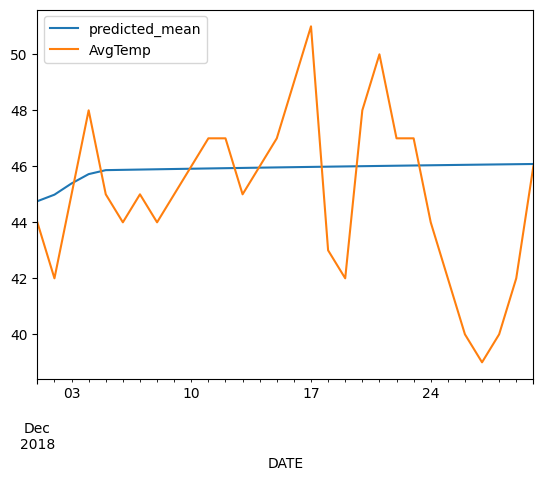

In [16]:
test_date = pd.date_range('2018-12-01', '2018-12-30')
pred.index = test_date
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)

In [17]:
test['AvgTemp'].mean()

45.0

In [19]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred, test['AvgTemp']))
print(rmse)

3.000463825206671


In [20]:
model2 = sm.tsa.arima.ARIMA(df['AvgTemp'], order=(1,0,5))
model2 = model2.fit()
df.tail()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753
2018-12-29,36.0,47.0,42.0,655,1753
2018-12-30,39.0,52.0,46.0,656,1754


6. For Future Dates

In [30]:
index_future_dates = pd.date_range(start = '2018-12-30', end='2019-01-29')
#print(index_future_dates)
pred = model2.predict(start = len(df), end = len(df)+30, type = 'levels').rename('ARIMA Predictions')
pred.index = index_future_dates

<Axes: >

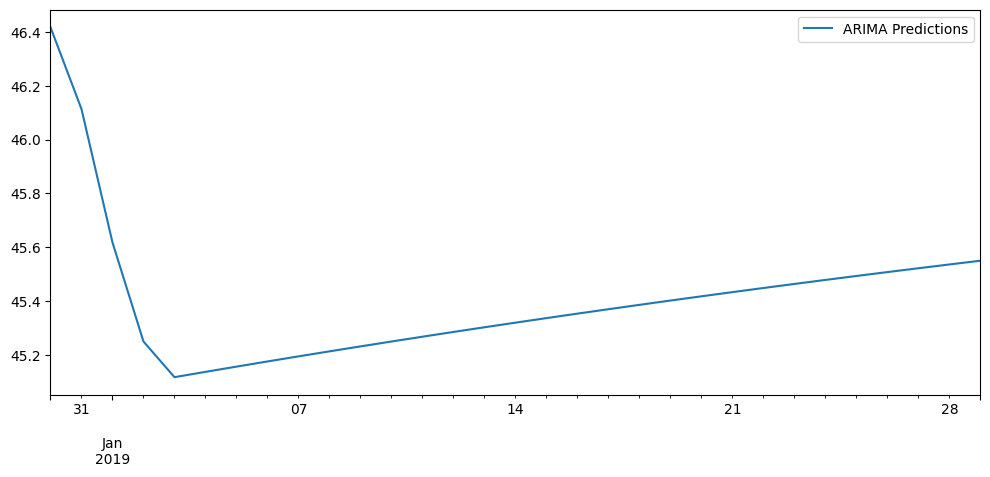

In [32]:
pred.plot(figsize=(12,5), legend=True)
